In [1]:
import src as esma

In [2]:
model = esma.project(project_id="UTe2") #Define project


In [3]:
model.get_structure(format='poscar') #Load structure

In [6]:
path = ['GAMMA','X',"L_0","T","W","R"] #define corners
num_points = 50 #number of points


In [7]:
model.band_points(path,num_points) #define path


In [8]:
import matplotlib.pyplot as plt
import numpy as np

In [9]:
plt.style.use('dark_background')


In [10]:
colors = [
    '#08F7FE',  # teal/cyan
    '#FE53BB',  # pink
    '#F5D300',  # yellow
    '#00ff41', # matrix green
]

In [11]:
ylim=[5,15]

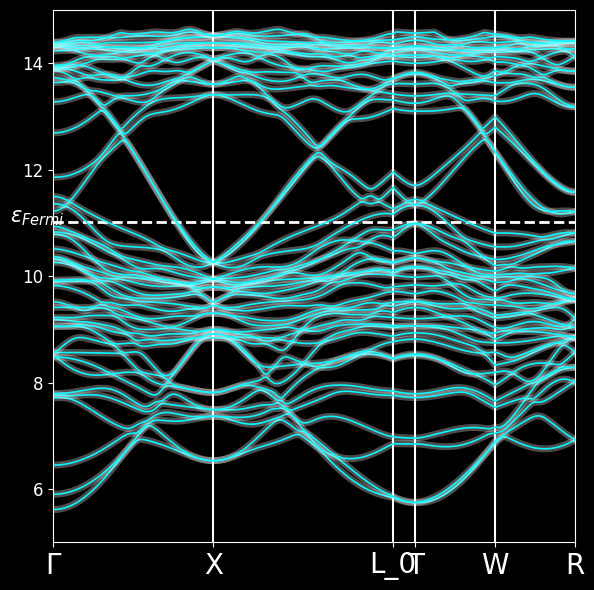

In [13]:
sym = esma.reads.read_symmetries(f'./Projects/{model.project_id}/{model.job_id}/bands-pp.out')
fermi = esma.reads.read_efermi(f'./Projects/{model.project_id}/{model.job_id}/scf.out')
fig = plt.figure(figsize=(6,6))
data = np.loadtxt(f'./Projects/{model.project_id}/{model.job_id}/bands.dat.gnu')
k = np.unique(data[:, 0])
bands = np.reshape(data[:, 1], (-1, len(k)))
for i in range(1,len(sym)-1):
    plt.axvline(sym[i])
plt.axhline(float(fermi),lw=2,linestyle='--')
for band in range(len(bands)):
    plt.plot(k, bands[band, :],lw=5,alpha=0.3,c='w')
    plt.plot(k, bands[band, :],lw=1.2,c='#08F7FE')
plt.xticks(sym,['Γ','X',"L_0","T","W","R"],size=20)
plt.yticks(size=12)
plt.text(-0.17, float(fermi), r'$\epsilon_{Fermi}$',fontsize=15)
plt.ylim(ylim[0],ylim[1])
plt.xlim(sym[0],sym[-1])
plt.tight_layout()
plt.savefig(f'./Projects/{model.project_id}/{model.job_id}/band.png')
